In [1]:
import numpy as np
import os

import torch
import torchvision
import torch.nn as nn

from fcn import FCN
from training_utils import*

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

There are two functions used to visualize the results:

- **plot_curves**: function to plot the learning curves of the mean squared error (MSE) loss and R2

    Parameters:

    - **folder**: folder of the considered case where training and test results are saved
    - **first_epoch,last_epoch**: first and last epochs to consider when plotting


- **plot_prediction**: function to visualize a prediction for a training/test image

    Parameters:
    
    - **img**: input HRTEM image
    - **lbl**: colum heights labels (ground truth)
    - **pred**: network's prediction


In [6]:
def plot_curves(folder,first_epoch,last_epoch):
    
    train_loss = np.load(folder + '/training_results/learning_curve/train_loss_learning_curve.npy',allow_pickle=True)
    test_loss = np.load(folder + '/test_results/learning_curve/test_loss_learning_curve.npy',allow_pickle=True)
    
    training_r2 = np.load(folder + '/training_results/learning_curve/train_r2_learning_curve.npy',allow_pickle=True)
    test_r2 = np.load(folder + '/test_results/learning_curve/test_r2_learning_curve.npy',allow_pickle=True)
    
    epochs = np.arange(first_epoch + 1, last_epoch +1)
    
    
        
    fig = plt.figure(figsize=(14,7),dpi = 100)
    
    ax = fig.add_subplot(1, 2, 1)
    plt.plot(epochs,train_loss[first_epoch:last_epoch],'b')
    plt.plot(epochs,test_loss[first_epoch:last_epoch],'r')
    plt.ylabel('MSE Loss',fontsize = 20)
    plt.xlabel('Epochs',fontsize = 20)
    plt.title('MSE Loss',fontsize = 20)
    plt.legend(['Training','Test'])
    
    ax = fig.add_subplot(1, 2, 2)
    plt.plot(epochs,training_r2[first_epoch:last_epoch],'b')
    plt.plot(epochs,test_r2[first_epoch:last_epoch],'r')
    plt.xlabel('Epochs',fontsize = 20)
    plt.ylabel('R2',fontsize = 20)
    plt.title('R2',fontsize = 20)
    plt.legend(['Training','Test'])
    
def plot_prediction(img,lbl,pred):
    
    fig = plt.figure(figsize=(14, 7))

    ax = fig.add_subplot(1, 3, 1)
    im = ax.imshow(img[0,0,:,:], cmap='gray')
    plt.title('HERTEM image', fontsize=20)
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax1)

    ax = fig.add_subplot(1, 3, 2)
    im = ax.imshow(lbl[0,0,:,:], cmap='jet')
    plt.title('CHs Ground Truth', fontsize=20)
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax1)

    ax = fig.add_subplot(1, 3, 3)
    im = ax.imshow(pred[0,0,:,:], cmap='jet')
    plt.title('CHs Prediction', fontsize=20)
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax1)

    r2_CHs = R2_CHs(pred, lbl)
    r2 = r2_CHs.get_r2_batch()

    print('R2: {:.3f}'.format(r2))

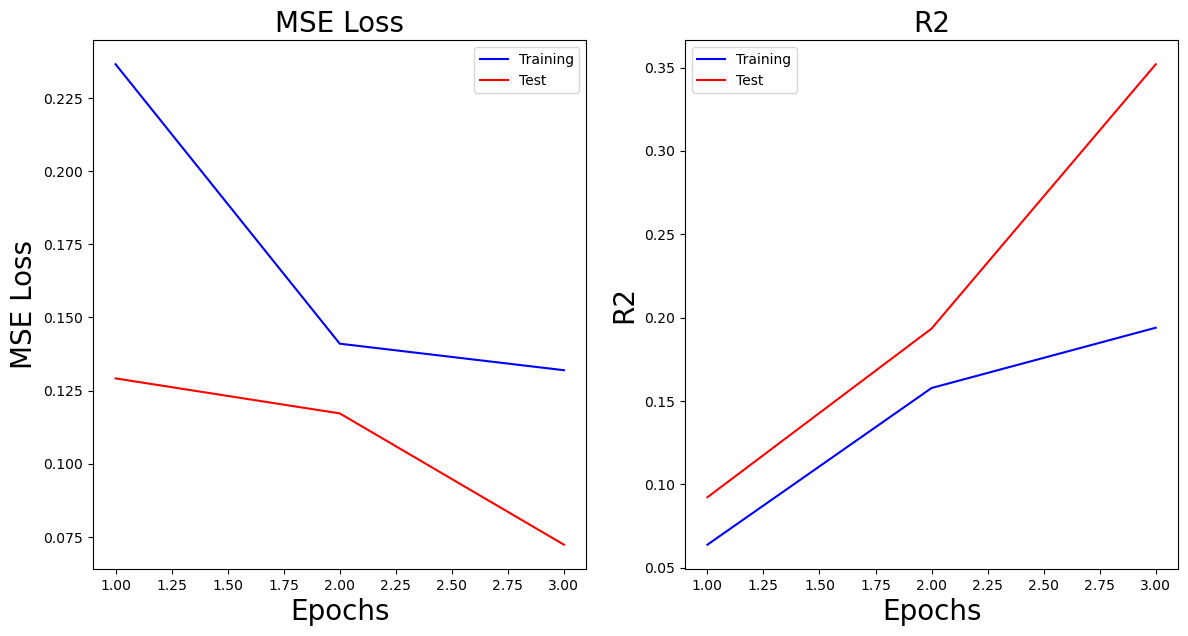

In [8]:
folder = 'results_default/'

plot_curves(folder,first_epoch=0,last_epoch = 3)

In [9]:
model = FCN()

epoch = 1

model.load_state_dict(torch.load(os.path.join(folder,'training_results/weights/epoch-{}.pkl').format(epoch)))

<All keys matched successfully>

R2: 0.000
R2: 0.026
R2: 0.000
R2: 0.033
R2: 0.000
R2: 0.000
R2: 0.000
R2: 0.000
R2: 0.000
R2: 0.000
R2: 0.019
R2: 0.000
R2: 0.000
R2: 0.000
R2: 0.062


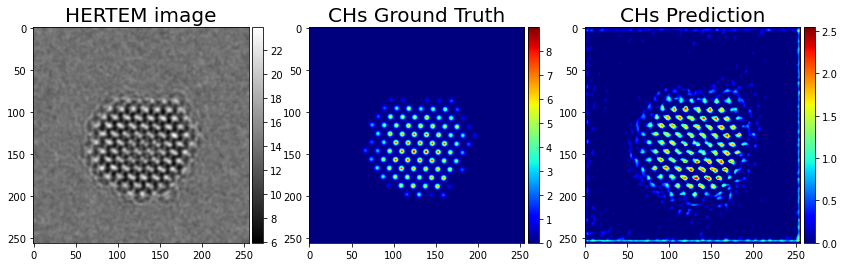

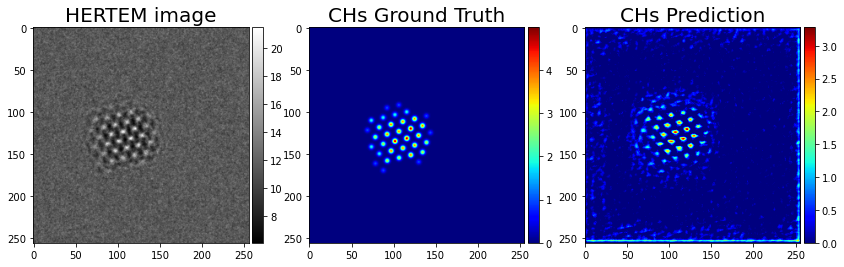

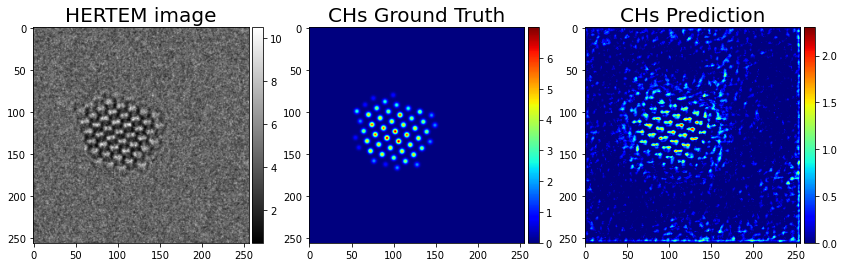

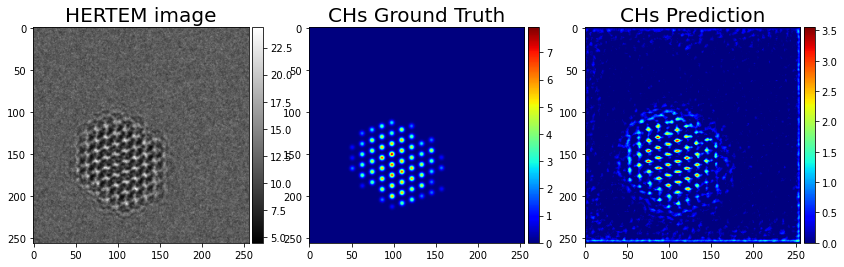

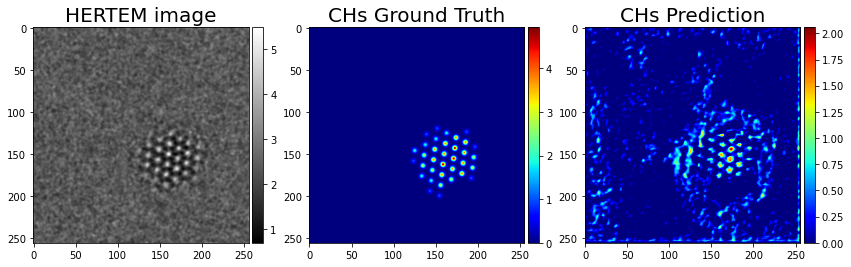

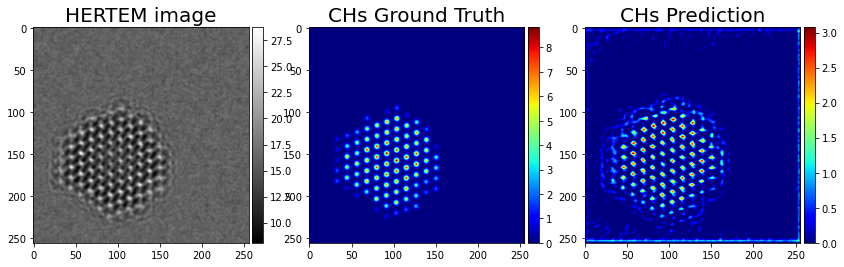

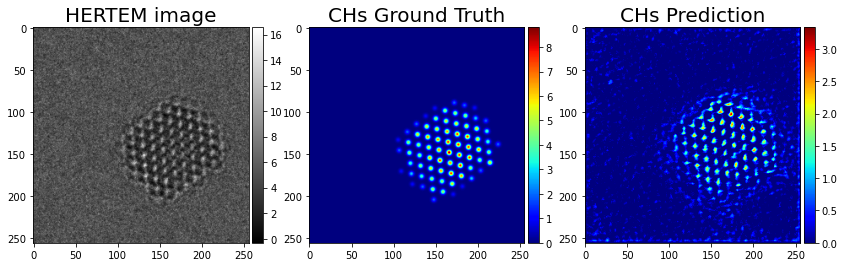

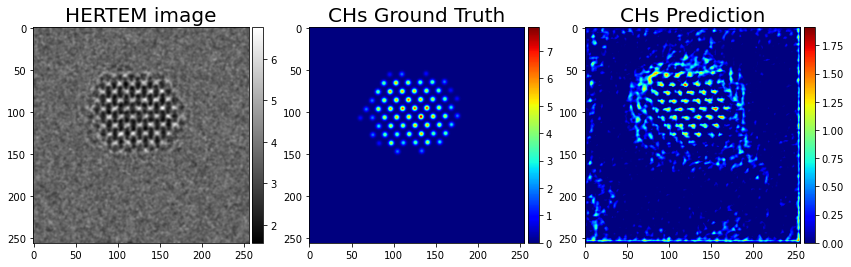

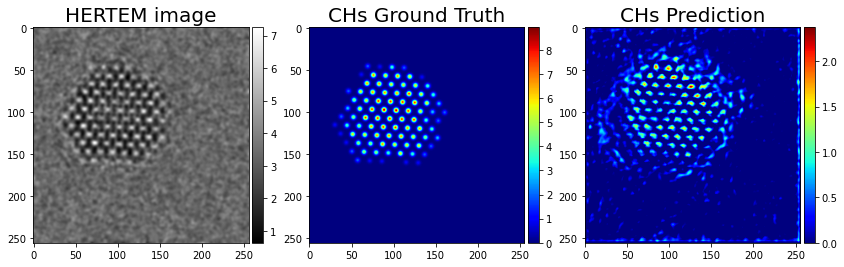

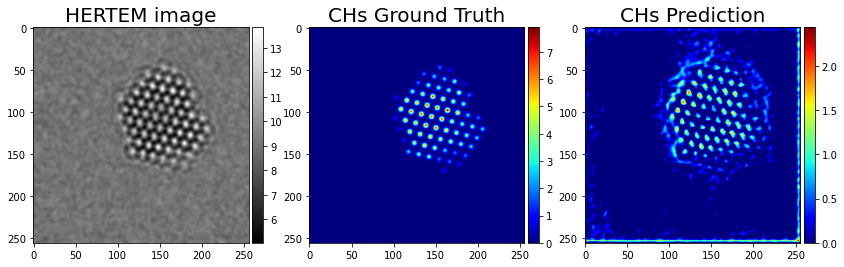

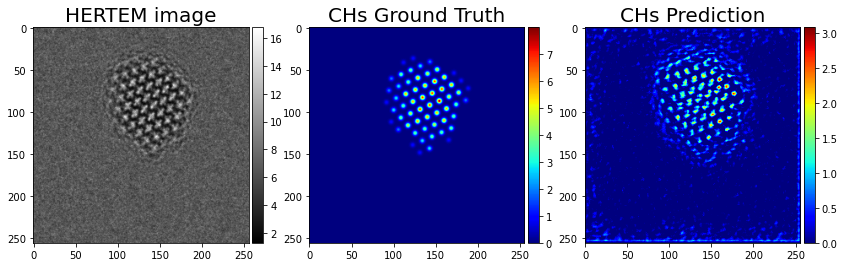

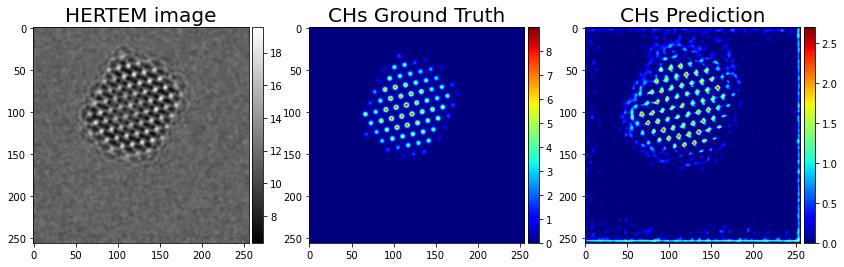

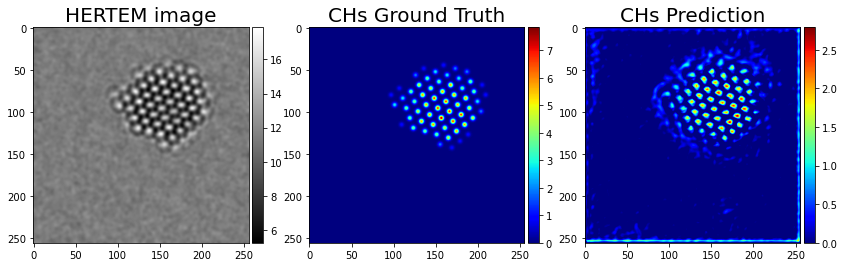

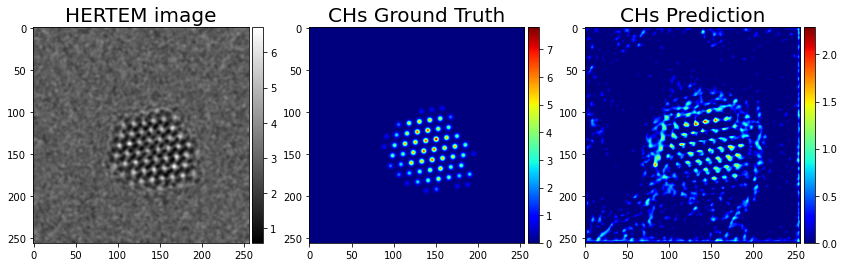

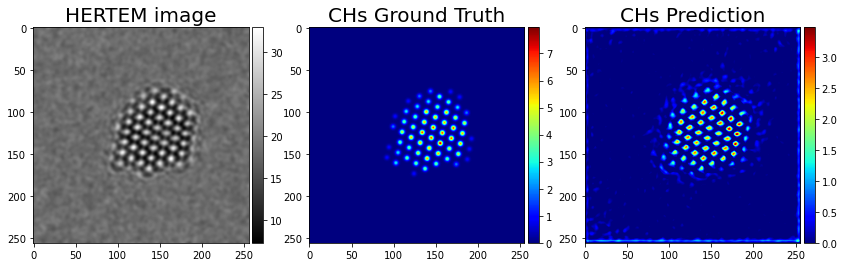

In [10]:
for i in range(5,20):

    data = np.load('../training_data/data/data_{}.npy'.format(i))

    img = data[0,:,:,0]
    img = img.reshape(1,1,img.shape[0],img.shape[1])

    lbl = data[0,:,:,1]
    lbl = lbl.reshape(1,1,lbl.shape[0],lbl.shape[1])
     
        
    rnd_imgng = Random_Imaging(image=img,labels=lbl)
    img,lbl = rnd_imgng.get_trasform()
    

    pred = model(torch.Tensor(img)).detach()

    plot_prediction(img,lbl,pred)